# Dato tipo textual

Un **corpus** es un dataset de texto que se compone de **documentos**, que son textos. Estos textos a su vez, se componen de **términos**.

El conjunto de todos los términos de los documentos de un corpus, constituye el **vocabulario** del corpus.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('congress_texts.csv')

Corpus de 259 documentos constituidos por intervenciones del congreso de los diputados

In [3]:
df.shape

(259, 4)

In [5]:
df.head()

,date,n_intervention,name,reduced_regex_text
0,2019-07-22,1,NaN,Listas de valores
1,2019-07-22,2,NaN,Cerrar
2,2019-07-22,3,NaN,"DS. Congreso de los Diputados, Pleno y Dip. Pe..."
3,2019-07-22,4,NaN,cve: DSCD 13 PL 2
4,2019-07-22,5,NaN,CORTES GENERALES DIARIO DE SESIONES DEL CONGRE...


In [8]:
df.date.value_counts()

2019-07-22    116
2019-07-23     88
2019-07-25     55
Name: date, dtype: int64

In [6]:
df.name.value_counts()

PRESIDENTA                                                          82
SÁNCHEZ PÉREZ CASTEJÓN (candidato a la Presidencia del Gobierno)    22
RUFIÁN ROMERO                                                        6
IGLESIAS TURRIÓN                                                     5
RIVERA DÍAZ                                                          5
CASADO BLANCO                                                        4
ESTEBAN BRAVO                                                        4
ABASCAL CONDE                                                        4
BORRÀS CASTANYER                                                     3
MAZÓN RAMOS                                                          3
BALDOVÍ RODA                                                         3
ORAMAS GONZÁLEZ MORO                                                 3
LASTRA FERNÁNDEZ                                                     2
SAYAS LÓPEZ                                                          2
AIZPUR

In [7]:
df.sample(5)

,date,n_intervention,name,reduced_regex_text
190,2019-07-23,76,SAYAS LÓPEZ,"Gracias, presidenta. Señor Sánchez, yo no sé ..."
159,2019-07-23,45,PRESIDENTA,"Gracias, señor Rufián. Tiene la palabra el ca..."
40,2019-07-22,44,NaN,Replica el señor Iglesias Turrión y duplica el...
248,2019-07-25,46,PRESIDENTA,"Gracias, señor Matute. Por el mismo grupo par..."
117,2019-07-23,2,NaN,Cerrar


In [11]:
df.reduced_regex_text.sample(5).to_list()

['Debate sobre la investidura del candidato a la Presidencia del Gobierno ...',
 ' Gracias, señor Asens. Tiene la palabra, por el mismo grupo parlamentario, el señor Garzón Espinosa.',
 'DS. Congreso de los Diputados, Pleno y Dip. Perm., núm. 3, de 23/07/2019',
 ' Buenos días. Muchas gracias, señora presidenta. Señorías, cuando el Partido Regionalista de Cantabria decidió presentarse a las elecciones del 28 de abril lo hizo con un doble objetivo: defender los intereses de Cantabria y apoyar la gobernabilidad de España. Muchos cántabros recogieron nuestro mensaje y nos votaron, por eso estoy hoy aquí para reafirmar este compromiso. Nuestra razón de ser y por la que se fundó el Partido Regionalista de Cantabria es defender los intereses de Cantabria; intereses que han sido menoscabados a lo largo de los últimos años muchas veces. No quiero contarles todos estos casos, pero sí voy a citar solamente uno a título de ejemplo para que, los que no lo saben, comprendan nuestra posición en este 

# Preprocesamiento

Normalización a minúsculas, eliminiación de puntuación, eliminación de tildes, eliminación de dígitos

In [12]:
df.reduced_regex_text.str.lower()

0                                      listas de valores
1                                                 cerrar
2      ds. congreso de los diputados, pleno y dip. pe...
3                                      cve: dscd 13 pl 2
4      cortes generales diario de sesiones del congre...
                             ...                        
254     gracias, señor baldoví. en último lugar, tien...
255     buenos días y muchas gracias, presidenta. señ...
256     muchas gracias, señor mazón. por el grupo par...
257     gracias, señora presidenta. señorías, hoy no ...
258     gracias, señora lastra. en cinco minutos inic...
Name: reduced_regex_text, Length: 259, dtype: object

In [34]:
re.sub(r"[áâàä]", "a", "aá")

'aa'

In [37]:
import re

original_string = "ñáéqa2e/? eqwefdgsgERERdf"

def normalize_string(st):
    # SUBSTITUTE NON WORD BY WHITESPACE
    val = re.sub(r"\W", " ", st)
    # SUBSTITUE ONE OR MORE DIGITS BY WHITESPACE
    val = re.sub(r"\d+", " ", val)
    # SUBSTITUTE ONE OR MORE WHITESPACES BY ONE WHITESPACE
    val = re.sub(r"\s+", " ", val)
    # SUBSTITUTE ACCENTS
    val = re.sub(r"[áâàä]", "a", val)
    val = re.sub(r"[éêèë]", "e", val)
    val = re.sub(r"[íîìï]", "i", val)
    val = re.sub(r"[óôòö]", "o", val)
    val = re.sub(r"[úûùü]", "u", val)
    
    return val

normalize_string(original_string)

'ñaeqa e eqwefdgsgERERdf'

In [38]:
normalize_string('DS. Congreso de los Diputados, Pleno y Dip. Perm., núm. 3, de 23/07/2019')

'DS Congreso de los Diputados Pleno y Dip Perm num de '

In [42]:
"  q    ".strip()

'q'

In [43]:
df['normalized_text'] = (df.reduced_regex_text.str.lower()                         
                         .map(lambda text: normalize_string(text))
                         .str.strip())

In [48]:
df.normalized_text.sample(3).to_list()

['gracias señora presidenta señorias señor sanchez habia un politico aleman que decia que el valor de un politico era el siguiente la inteligencia menos la soberbia usted esta suspendido en este debate de investidura dicho eso esta diputada no es su enemiga esta diputada por su trabajo por ser coherente por trabajar y por luchar por su tierra hoy ve aumentado el numero de miembros de su grupo y somos dos diputadas y tenemos miles de votos mas a ver si aprovecha y esos asesores que tiene le pasan bien los papelitos porque a usted que ayer queria cambiar la constitucion porque es una anomalia democratica que no gobierne la lista mas votada le dire que en el cabildo de fuerteventura en el la palma y en el de tenerife gano coalicion canaria y su partido con transfugas y con tres fuerzas politicas ha desalojado a coalicion canaria ha dicho que ustedes ganaron pero no en gran canaria ni en esos tres cabildos y mañana se votan las mociones de censura que ustedes han hecho con transfugas despu

# Vocabulario

El vocabulario del corpus es un diccionario donde en las claves están los términos y en los valores el conteo de apariciones en el corpus

In [51]:
df.normalized_text.iloc[0].split()

['listas', 'de', 'valores']

In [53]:
vocabulary = {}

for text in df.normalized_text:
    token_list = text.split()
    for token in token_list:
        if token in vocabulary:
            vocabulary[token] += 1
        else:
            vocabulary[token] = 1    

In [62]:
vocab_series = pd.Series(vocabulary).sort_values(ascending=False)

In [58]:
vocab_series.head(30)

de          6280
que         5633
la          4068
y           3460
a           2939
en          2889
el          2846
no          1775
los         1609
es          1501
un          1368
con         1313
del         1206
lo          1182
por         1104
se          1071
para        1011
una          984
las          982
usted        855
señor        852
gobierno     698
al           656
como         617
ha           617
si           604
su           532
esta         504
pero         466
le           461
dtype: int64

In [60]:
vocab_series.iloc[100:130]

solo          129
creo          127
camara        127
rivera        126
presidente    125
hecho         124
decir         123
social        123
vamos         121
quiere        121
sino          121
dicho         120
plan          119
politicas     117
parte         117
iglesias      116
entre         116
problema      113
ahora         112
casado        111
menos         111
vez           110
unidas        110
señores       110
durante       110
mismo         108
muchos        108
asi           108
tienen        106
contra        106
dtype: int64

In [61]:
vocab_series.iloc[500:530]

relacion            25
nueva               25
europeo             25
confianza           25
infraestructuras    25
resolver            25
garantizar          25
abascal             25
seria               25
seis                25
distintos           24
bienestar           24
partir              24
esperanza           24
necesita            24
demas               24
agradezco           24
entiendo            24
amenaza             24
competencias        24
soberania           24
cuanto              24
nuevas              24
principios          24
vista               24
nivel               24
torra               24
numero              24
creemos             24
defensa             24
dtype: int64

In [59]:
vocab_series.tail(30)

ruperez          1
admirado         1
embajador        1
admirable        1
arnaldo          1
colaboraron      1
tenebrosa        1
coartada         1
caimos           1
nueces           1
contemple        1
equivalente      1
usufructuario    1
anega            1
holanda          1
confluyen        1
cabecillas       1
exigirle         1
liquidacion      1
exportaciones    1
infamia          1
conceder         1
excarcelar       1
legalizar        1
formalmente      1
integro          1
triplicado       1
sorprendera      1
televisada       1
recuento         1
dtype: int64

In [64]:
vocab_series.shape

(10157,)

In [66]:
import numpy as np

quantiles = np.linspace(0, 1, 21)
vocab_series.describe(percentiles=quantiles)

count    10157.000000
mean        11.599685
std        122.908934
min          1.000000
0%           1.000000
5%           1.000000
10%          1.000000
15%          1.000000
20%          1.000000
25%          1.000000
30%          1.000000
35%          1.000000
40%          1.000000
45%          1.000000
50%          2.000000
55%          2.000000
60%          2.000000
65%          2.000000
70%          3.000000
75%          4.000000
80%          5.000000
85%          7.000000
90%         12.000000
95%         25.000000
100%      6280.000000
max       6280.000000
dtype: float64

In [78]:
vocab_series.describe(percentiles=[0.95, 0.97, 0.98, 0.99, 0.995])

count    10157.000000
mean        11.599685
std        122.908934
min          1.000000
50%          2.000000
95%         25.000000
97%         46.000000
98%         66.000000
99%        127.000000
99.5%      242.440000
max       6280.000000
dtype: float64

In [70]:
vocab_series

de             6280
que            5633
la             4068
y              3460
a              2939
               ... 
integro           1
triplicado        1
sorprendera       1
televisada        1
recuento          1
Length: 10157, dtype: int64

In [75]:
# vocab_series.plot.hist(bins=100, xlim=(500, 7000));

## Localizar *stopwords*

Palabras que se repiten mucho y son pegamento en el texto del corpus, sin ser informativas.

In [80]:
vocab_series.describe(percentiles=[0.95, 0.97, 0.98, 0.99, 0.995, 0.999])

count    10157.000000
mean        11.599685
std        122.908934
min          1.000000
50%          2.000000
95%         25.000000
97%         46.000000
98%         66.000000
99%        127.000000
99.5%      242.440000
99.9%     1359.420000
max       6280.000000
dtype: float64

In [98]:
corpus_stop_words = set(vocab_series.loc[vocab_series.gt(250)].index.to_list())
corpus_stop_words

{'a',
 'al',
 'aplausos',
 'como',
 'con',
 'de',
 'del',
 'el',
 'en',
 'es',
 'eso',
 'españa',
 'esta',
 'este',
 'gobierno',
 'ha',
 'han',
 'hay',
 'la',
 'las',
 'le',
 'lo',
 'los',
 'mas',
 'me',
 'no',
 'nos',
 'o',
 'para',
 'partido',
 'pero',
 'por',
 'porque',
 'que',
 'sanchez',
 'se',
 'señor',
 'si',
 'su',
 'tambien',
 'tiene',
 'un',
 'una',
 'usted',
 'ustedes',
 'y'}

Ejecutar primero

```shell
pip install nltk
```

y luego en python

```python
import nltk
nltk.download('stopwords')
```

In [101]:
import nltk

generic_stopwords = nltk.corpus.stopwords.words('spanish')
generic_stopwords = set([normalize_string(word) for word in generic_stopwords])
generic_stopwords

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eramos',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estabamos',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estais',
 'estamos',
 'estan',
 'estando',
 'estar',
 'estara',
 'estaran',
 'estaras',
 'estare',
 'estareis',
 'estaremos',
 'estaria',
 'estariais',
 'estariamos',
 'estarian',
 'estarias',
 'estas',
 'este',
 'esteis',
 'estemos',
 'esten',
 'estes',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieramos',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesemos',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuvo',
 'fue',
 'fuera',
 'fuerais'

In [102]:
stop_words = corpus_stop_words.union(generic_stopwords)
len(stop_words)

314

In [111]:
example_text = df.normalized_text.iloc[202]
example_text

'y es verdad tambien que corro el riesgo de ser el primer candidato a la presidencia del gobierno que sufre dos investiduras fallidas en la historia de la democracia no sera porque no lo he intentado es verdad que siempre me he encontrado con el mismo obstaculo pero a lo unico que apelo es a la responsabilidad y a la generosidad de todos fijense yo no pierdo la esperanza y no pierdo la esperanza en los diputados y diputadas porque a diferencia del mensaje o de la imagen que podamos trasladar despues de esta sesion de investidura del debate que hemos tenido tan encendido y en algunas ocasiones tan intenso durante estos dos dias de sesion yo si que reivindico la capacidad de acuerdo que tiene la clase politica española la tenemos la hemos tenido durante estos ultimos cuarenta años muchos de los partidos que estamos aqui presentes singularmente el partido popular y el partido socialista tanto cuando gobernaba el partido socialista como cuando gobernaba el partido popular hemos firmado pac

In [112]:
def remove_stopwords_from_text(text, stopwords_set):
    val = ' '.join([word for word in text.split() 
                    if word not in stopwords_set])
    return val

remove_stopwords_from_text(text=example_text, stopwords_set=stop_words)

'verdad corro riesgo ser primer candidato presidencia sufre dos investiduras fallidas historia democracia intentado verdad siempre encontrado mismo obstaculo unico apelo responsabilidad generosidad fijense pierdo esperanza pierdo esperanza diputados diputadas diferencia mensaje imagen podamos trasladar despues sesion investidura debate tan encendido ocasiones tan intenso dos dias sesion reivindico capacidad acuerdo clase politica española ultimos cuarenta años partidos aqui presentes singularmente popular socialista gobernaba socialista gobernaba popular firmado pactos importantes libertad seguridad nacion pactos terrorismo eta duda alguna terrorismo internacional llegado acuerdos ultimos doce meses muchas fuerzas parlamentarias aqui presentes caras distintas bien reducido numero parlamentarios bien aumentado unidas podemos ciudadanos partidos nacionalistas partidos independentistas popular logrado acuerdos reales decretos leyes importantes decir defiendo capacidad acuerdo todas fuerza

In [113]:
df['clean_normalized_text'] = \
df.normalized_text.map(lambda text: 
                       remove_stopwords_from_text(text=text, 
                                                  stopwords_set=stop_words))

In [115]:
df.clean_normalized_text.sample(3).to_list()

['tres apuntes citado euskobarometro herramienta demoscopica puesta duda igual pone duda cis cualquier caso dejamos herramientas demoscopicas tomamos camino directo acordamos consulta dilucidar realmente quiere sociedad asi simple respecto estatuto autonomia presenta marco ideal reivindicaciones demostrado ve asi quiere verlo modelo agotado ciudadania vasca reivindicaciones planteando popular llevan ademas cuarenta años incumplimiento estatuto autonomia momento cav pendientes transferencia treinta seis competencias veinticinco pendientes nafarroa finalmente hablado crisis general olvidado crisis general cierto señalado exactamente intervencion anterior triple crisis crisis institucionalidad desafeccion todavia mayor respecto monarquia evidente español crisis economica efectivamente motivada dominio elites clases populares crisis territorial da respuesta reivindicaciones ciudadania vasca catalana siendo asi realmente tres interrelacionadas tres provienen regimen queremos superarlo dejar

- esperar, esperaban, esperais, ...
- hora, horas

# Representación léxica de texto

Representación de tipo bolsa de palabras, basada en conteo.

In [117]:
text = "hola buenos dias, que tal buenos dias"

In [119]:
def get_token_count_repr(text):
    tokens = text.split()
    doc_dict = {}
    for token in tokens:
        if token in doc_dict:
            doc_dict[token] += 1
        else:
            doc_dict[token] = 1
    return doc_dict

get_token_count_repr(text)

{'hola': 1, 'buenos': 2, 'dias,': 1, 'que': 1, 'tal': 1, 'dias': 1}

In [124]:
get_token_count_repr(df.clean_normalized_text.iloc[200])

{'gracias': 1,
 'señora': 2,
 'presidenta': 1,
 'primer': 1,
 'lugar': 1,
 'deseo': 2,
 'agradecer': 2,
 'lastra': 1,
 'adriana': 1,
 'palabras': 1,
 'pronunciadas': 1,
 'discurso': 1,
 'tan': 1,
 'brillante': 1,
 'hecho': 1,
 'varios': 1,
 'señores': 1,
 'diputados': 2,
 'oooh': 1,
 'reconocidos': 1,
 'duda': 1,
 'claro': 1,
 'logicamente': 1,
 'apoyo': 1,
 'diputadas': 1,
 'grupo': 1,
 'parlamentario': 1,
 'socialista': 1,
 'van': 1,
 'votar': 1,
 'favor': 1,
 'candidatura': 1,
 'persona': 1,
 'presidencia': 1,
 'verdad': 1,
 'señorias': 1,
 'ultimos': 1,
 'meses': 1,
 'ocurrido': 1,
 'cosas': 1,
 'primera': 2,
 'vez': 2,
 'historia': 2,
 'democracia': 2,
 'materializo': 1,
 'salio': 1,
 'adelante': 1,
 'mocion': 1,
 'censura': 1,
 'cierto': 1,
 'lidere': 1,
 'rumores': 1}

https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

## Representación por conteo TF

Se podría conocer también como **TF** term frequency

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
text_arr = count_vectorizer.fit_transform(df.clean_normalized_text)
text_arr = text_arr.toarray()
text_arr.shape

(259, 9928)

In [137]:
text_df = pd.DataFrame(text_arr, columns=count_vectorizer.get_feature_names_out())
text_df

,abajo,abalos,abandonado,abandonados,abandonan,abandonaran,abandone,abandonen,abandono,abanico,...,zapatos,zaragoza,zarpazo,zarzuela,zoco,zona,zonas,zorro,zozobra,zurita
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
sparse_proportion = text_df.eq(0).sum().sum() / text_df.shape[0] / text_df.shape[1]
sparse_proportion

0.9877282456855382

In [141]:
count_vectorizer = CountVectorizer()
text_arr = count_vectorizer.fit_transform([
    "hola hola hola que tal hola yo bien",
    "hola me llamo la compañia electrica a ver que tal"
])
text_arr = text_arr.toarray()
pd.DataFrame(text_arr, columns=count_vectorizer.get_feature_names_out())

,bien,compañia,electrica,hola,la,llamo,me,que,tal,ver,yo
0,1,0,0,4,0,0,0,1,1,0,1
1,0,1,1,1,1,1,1,1,1,1,0


In [142]:
count_vectorizer = CountVectorizer(binary=True)
text_arr = count_vectorizer.fit_transform([
    "hola hola hola que tal hola yo bien",
    "hola me llamo la compañia electrica a ver que tal"
])
text_arr = text_arr.toarray()
pd.DataFrame(text_arr, columns=count_vectorizer.get_feature_names_out())

,bien,compañia,electrica,hola,la,llamo,me,que,tal,ver,yo
0,1,0,0,1,0,0,0,1,1,0,1
1,0,1,1,1,1,1,1,1,1,1,0


## Representación TF-IDF

**LEY: un término es más informativo conforme menos aparece en el corpus**

**SER INFORMATIVO: un evento es más informativo conforme menos probabilidad de suceder tiene ya que es más "raro"**. Con los términos o palabras sucede similar.


tf-idf significa **term frequency - inverse document frequency**

https://en.wikipedia.org/wiki/Tf%E2%80%93idf

- **term frequency (TF)**: es la cantidad de veces que aparece el término en el documento.
- **document frequency (DF)**: es la **cantidad de documentos del corpus** en los que aparece el término.
- **inverse document frequency (IDF)**: es 1.0 dividido entre document frequency -> `1.0 / DF`

**TF-IDF para un término de un documento es el producto de TF por IDF para ese término** `TF * IDF`

IDF es un proxy hacia la "rareza o capacidad informativa de un término"

Si el corpus es

[
    "hola hola hola que tal hola yo bien",
    "hola me llamo la compañia electrica a ver que tal"
]

- para el término "hola": 
    - tf del documento 0 es 4
    - tf del documento 1 es 1
    - df es 2
- para el término "bien": 
   - tf del documento 0 es 1
   - tf del documento 1 es 0
   - df es 1
   
OJO:

- **tf** es un valor que se asocia a un término  y documento.
- **df** es un valor que se asocia a un término y corpus.

Si decimos 20 veces "hola" en un documento, pero tenemos 1000 documentos que contienen "hola", el valor TF-IDF para "hola" en el documento, es de 20 * 1 / 1000

In [148]:
20 * 1 / 1000

0.02

Es casi nulo, reduciendo el impacto del término "hola" en la representación del texto en función de lo informativo que es el término a lo largo del corpus (IDF).

In [161]:
corpus = [ f"hola buenos días {st}" for st in "abcdefghijkl"]  + [ "hola buenos días me tocó la lotería"]
corpus

['hola buenos días a',
 'hola buenos días b',
 'hola buenos días c',
 'hola buenos días d',
 'hola buenos días e',
 'hola buenos días f',
 'hola buenos días g',
 'hola buenos días h',
 'hola buenos días i',
 'hola buenos días j',
 'hola buenos días k',
 'hola buenos días l',
 'hola buenos días me tocó la lotería']

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
text_arr = tfidf_vectorizer.fit_transform(corpus)
text_arr = text_arr.toarray()
text_df = pd.DataFrame(text_arr, columns=tfidf_vectorizer.get_feature_names_out())
text_df

,buenos,días,hola,la,lotería,me,tocó
0,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
1,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
2,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
3,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
4,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
5,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
6,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
7,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
8,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000
9,0.577350,0.577350,0.577350,0.000000,0.000000,0.000000,0.000000


In [162]:
count_vectorizer = CountVectorizer()
text_arr = count_vectorizer.fit_transform(corpus)
text_arr = text_arr.toarray()
pd.DataFrame(text_arr, columns=count_vectorizer.get_feature_names_out())

,buenos,días,hola,la,lotería,me,tocó
0,1,1,1,0,0,0,0
1,1,1,1,0,0,0,0
2,1,1,1,0,0,0,0
3,1,1,1,0,0,0,0
4,1,1,1,0,0,0,0
5,1,1,1,0,0,0,0
6,1,1,1,0,0,0,0
7,1,1,1,0,0,0,0
8,1,1,1,0,0,0,0
9,1,1,1,0,0,0,0


In [156]:
# !pip show scikit-learn

In [157]:
# !pip install -U scikit-learn

# Descubrimiento de temas en el corpus

**topic modelling**

https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

In [195]:
n_samples = 2000
n_features = 3000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [196]:
from time import time

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [197]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [198]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features,
)
tfidf = tfidf_vectorizer.fit_transform(df.clean_normalized_text)

In [199]:
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features
)
tf = tf_vectorizer.fit_transform(df.clean_normalized_text)

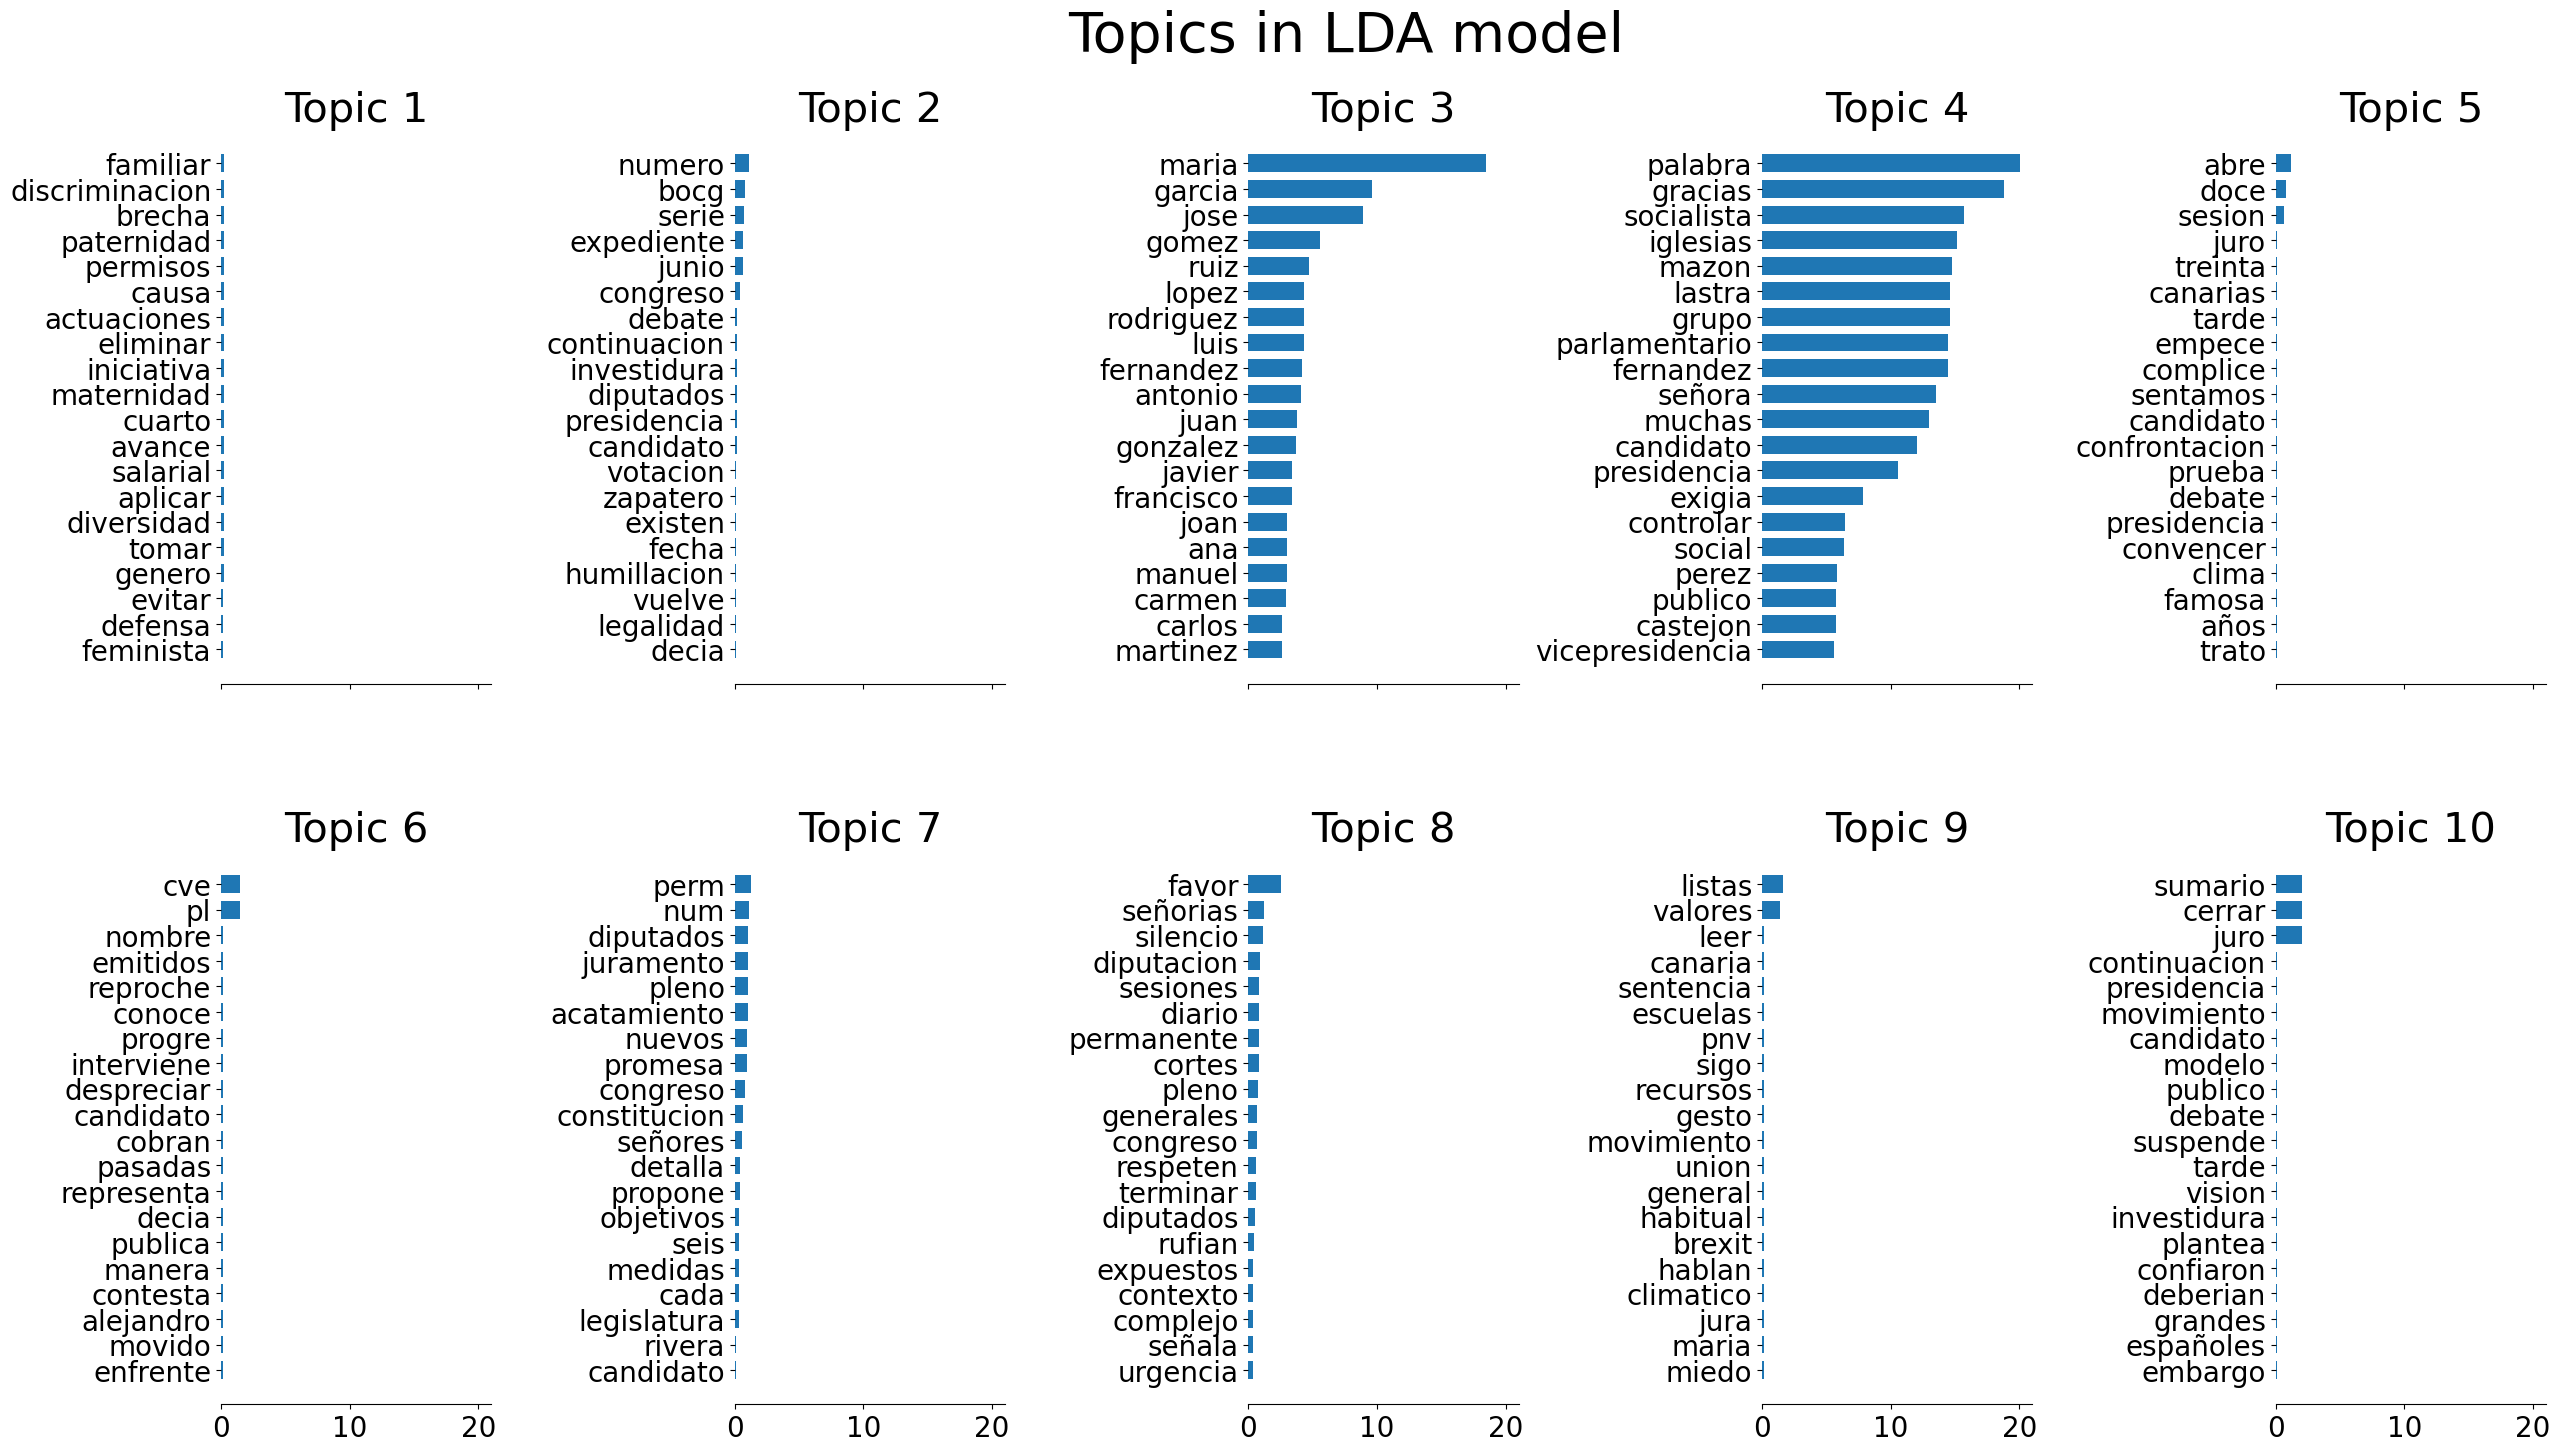

In [200]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=30,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda.fit(tfidf)

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [202]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, 
    min_df=1, 
    max_features=n_features, sublinear_tf=True
)
tfidf = tfidf_vectorizer.fit_transform(df.clean_normalized_text)

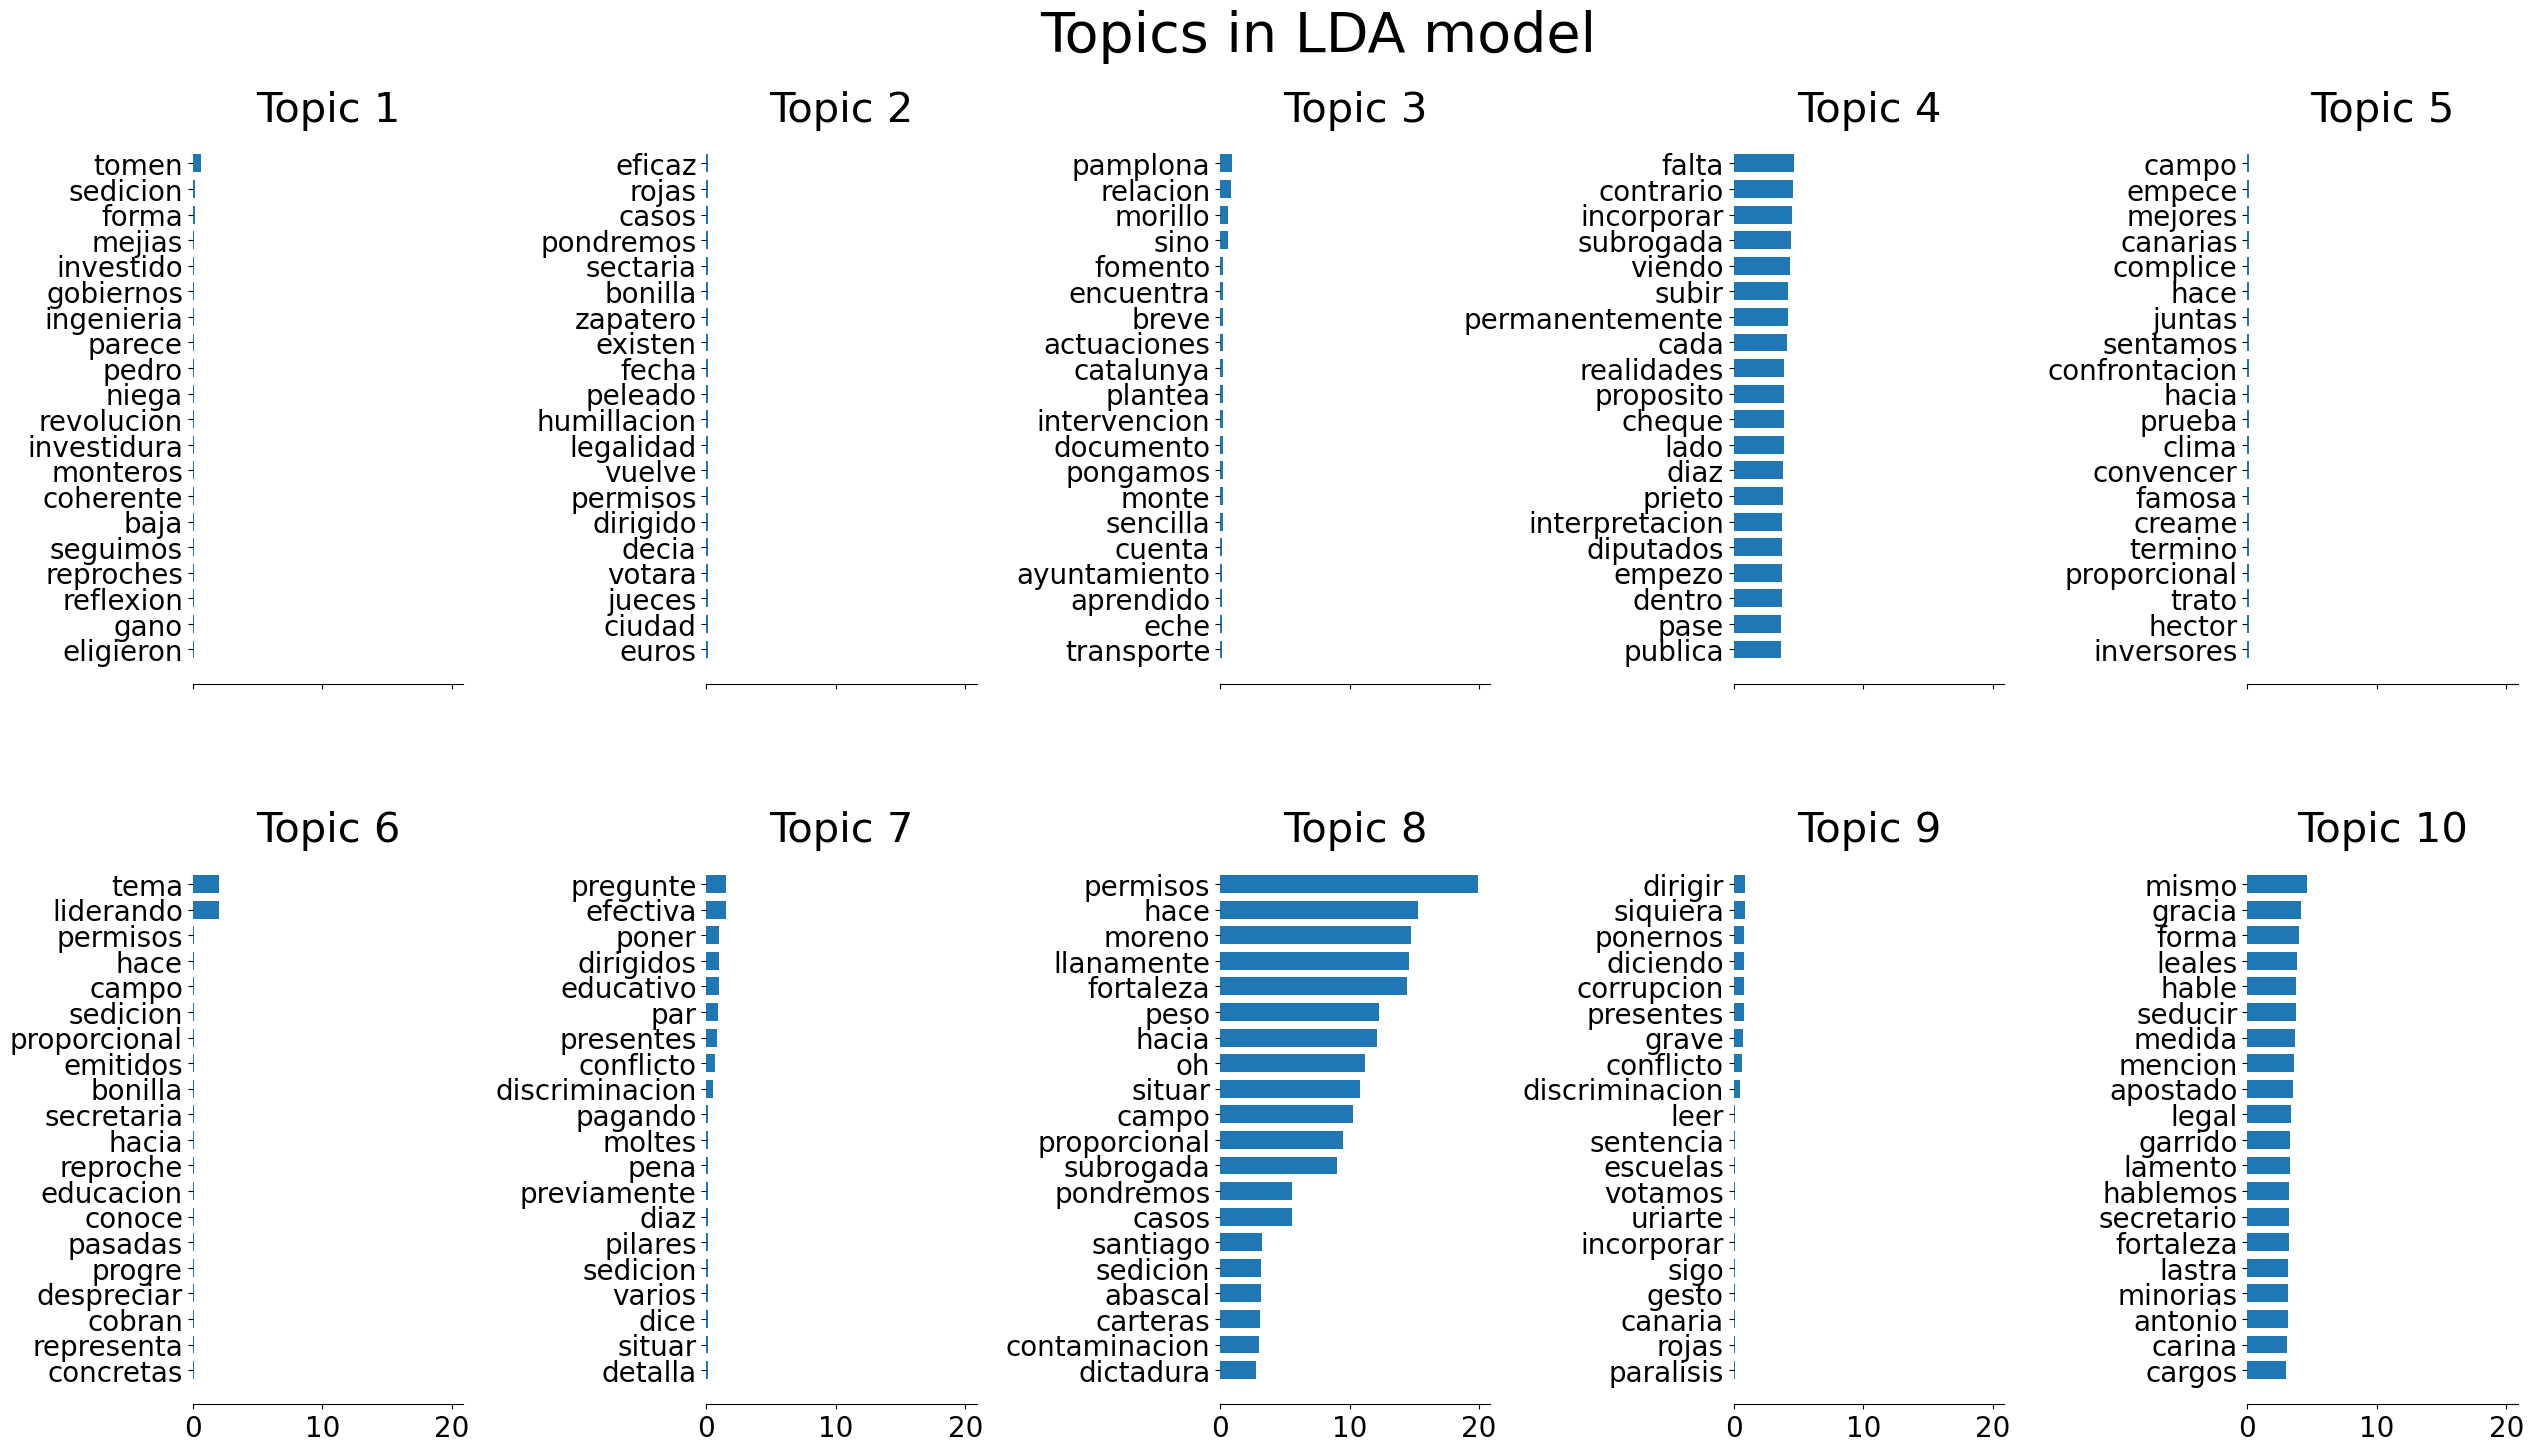

In [203]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=30,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda.fit(tfidf)

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [207]:
topics = lda.transform(tfidf)
topics.shape

(259, 10)

In [213]:
df.normalized_text.iloc[60]

'gracias presidenta buenas tardes ya señorias en cuarenta años atras se celebro el primer debate de investidura en esta camara muchos de quienes estan presentes hoy aqui o bien no habian nacido o como es mi caso eramos tan niños que no guardamos un recuerdo de ese instante politico en aquellos tiempos todavia no estaban esos agujeros de bala en el techo del hemiciclo el aire estaba lleno de humo del tabaco de los diputados en su mayoria hombres y quien queria hacer una llamada tenia que hacerlo desde un telefono fijo ha pasado mucho tiempo señorias pero el ritual democratico de la investidura que esta reglado en nuestra constitucion continua siendo el mismo el jefe del estado encarga a uno de los candidatos generalmente el que tiene y representa la mayoria parlamentaria de la camara a que exponga su programa y solicite la confianza de la mayoria para formar gobierno y esto es lo que pretendo hacer durante estos proximos dias señorias solicitar su confianza apelar a su responsabilidad a

In [214]:
topics[60]

array([0.00265927, 0.00265924, 0.00265942, 0.96552089, 0.00265924,
       0.00265924, 0.00265925, 0.00266324, 0.00265936, 0.01320084])

In [209]:
topics[0].sum()

1.0